# 1. Import modules

In [1]:
import os
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi



In [2]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

# 2. Load ATAC data 

Data below can be generated using the notebook as:

[2_prepare_atac_mop_episcanpy](2_prepare_atac_mop_episcanpy.ipynb)

In [3]:
data_path = r'L:\Shiwei\DNA_MERFISH_analysis\Analysis_MOp_methylation_ATAC\data\EckerRen_Mouse_MOp_methylation_ATAC'

In [8]:
adata = ad.read(os.path.join(data_path, 'MOp_ATAC_combined_preprocessed.h5ad'))

In [9]:
adata

AnnData object with n_obs × n_vars = 89924 × 450148
    obs: 'barcode', 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'nb_features', 'log_nb_features', 'cluster', 'leiden'
    var: 'name', 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalized'
    obsp: 'connectivities', 'distances'

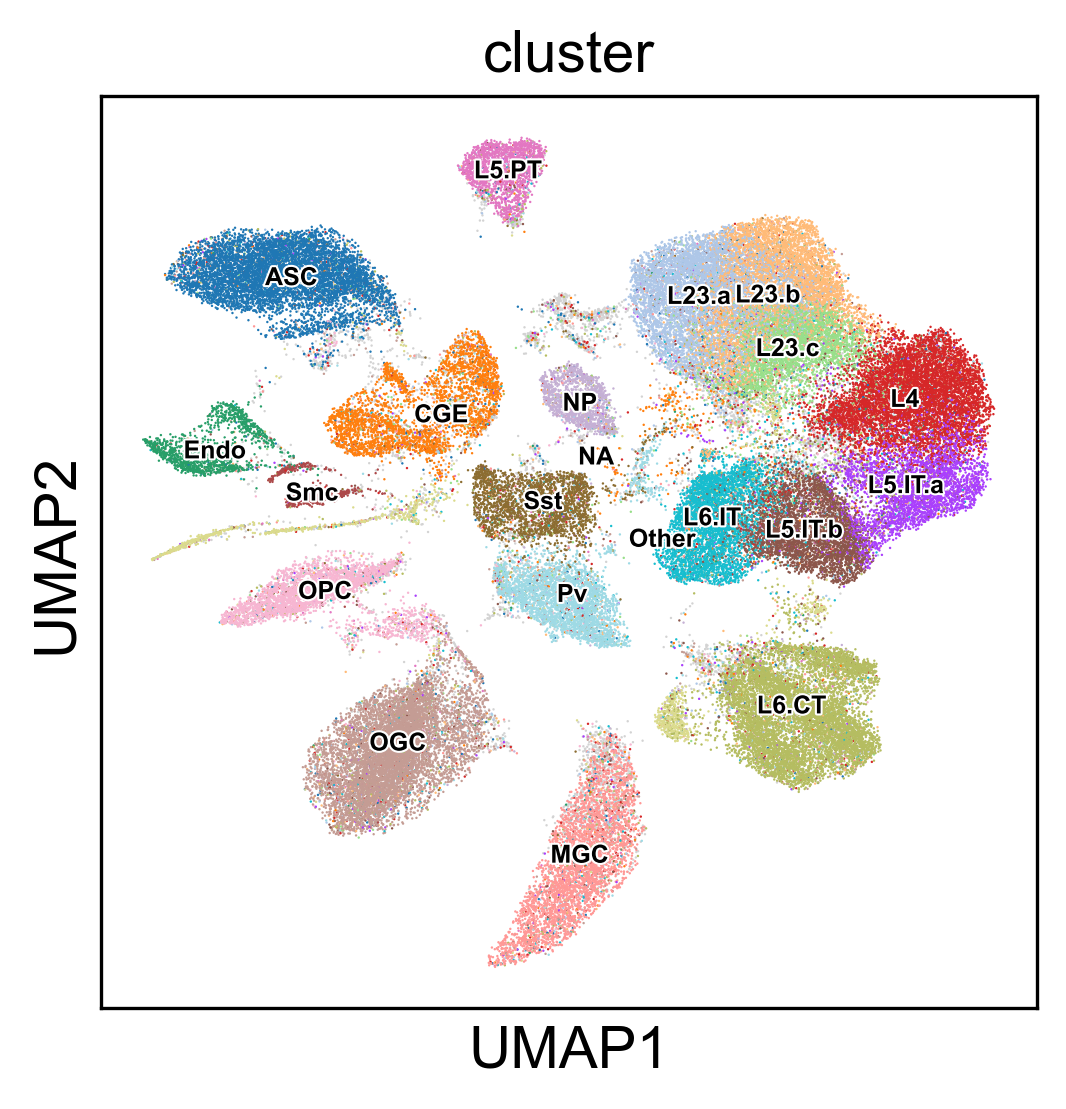

In [10]:
sc.settings.set_figure_params(dpi=150, color_map='gist_earth')
epi.pl.umap(adata, color=['cluster'], legend_loc='on data', legend_fontsize=6,legend_fontoutline=1)

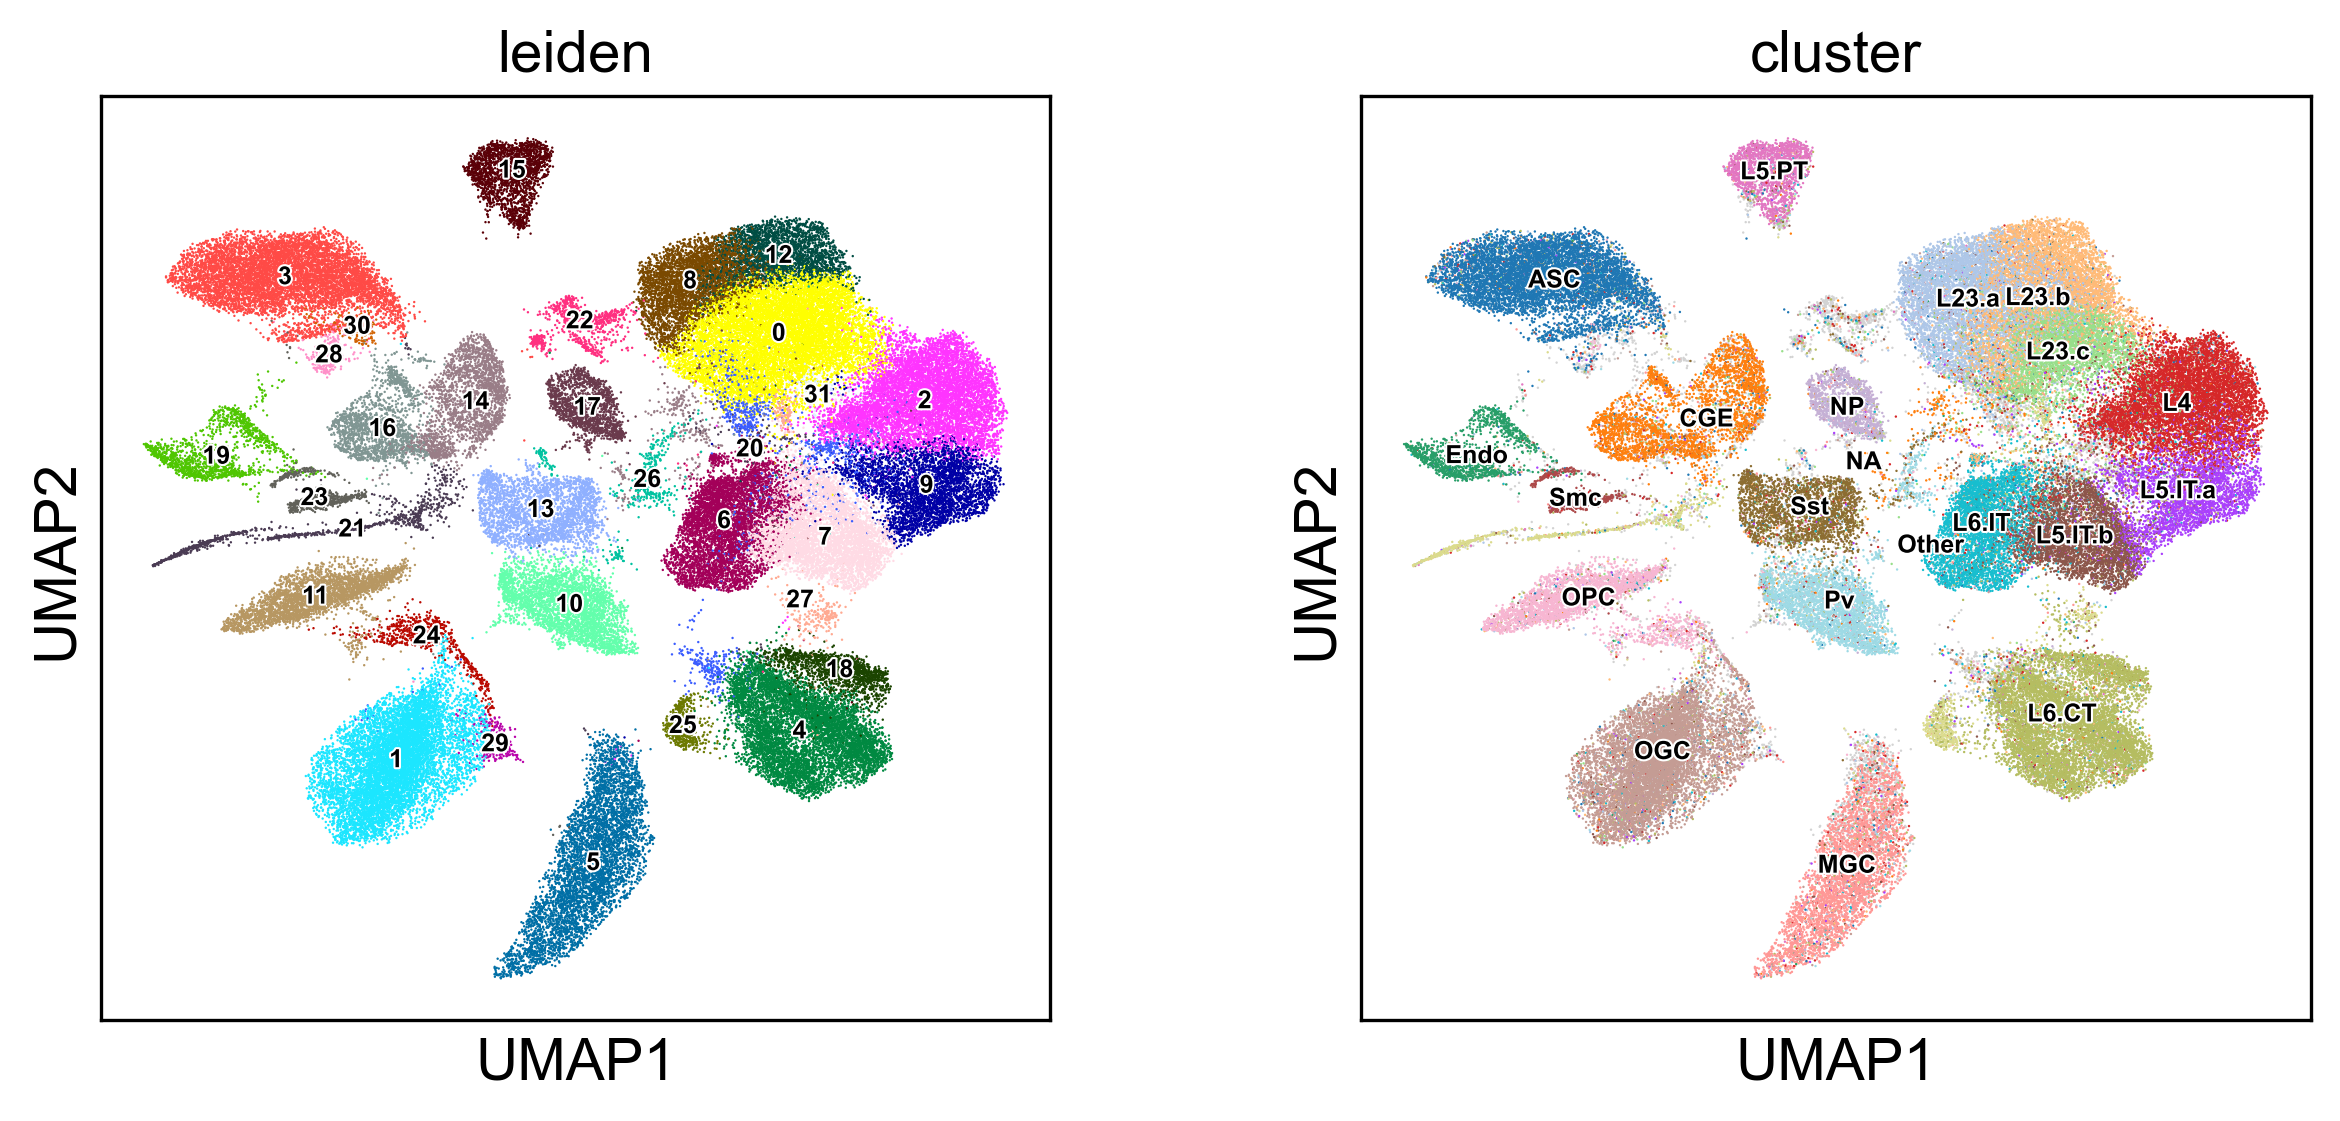

In [50]:
sc.settings.set_figure_params(dpi=150, color_map='gist_earth')
epi.pl.umap(adata, color=['leiden','cluster'], legend_loc='on data', legend_fontsize=6,legend_fontoutline=1)

# 3. Change labels

## 3.1 subclass

In [34]:
adata.obs['subclass_label_new'] = adata.obs['cluster']

In [35]:
np.unique(adata.obs['subclass_label_new'].tolist())

array(['ASC', 'CGE', 'Endo', 'L23.a', 'L23.b', 'L23.c', 'L4', 'L5.IT.a',
       'L5.IT.b', 'L5.PT', 'L6.CT', 'L6.IT', 'MGC', 'NP', 'OGC', 'OPC',
       'Other', 'Pv', 'Smc', 'Sst', 'nan'], dtype='<U32')

In [36]:
new_class_dict = {}

for _class in ['L23.a', 'L23.b', 'L23.c']:
    new_class_dict[_class]='L2/3 IT'
    
for _class in ['L4']:
    new_class_dict[_class]='L4/5 IT'
    
for _class in ['L5.IT.a', 'L5.IT.b']:
    new_class_dict[_class]='L5 IT'
    
for _class in ['L6.IT']:
    new_class_dict[_class]='L6 IT'
    
for _class in ['L5.PT']:
    new_class_dict[_class]='L5 ET'
    
for _class in ['L6.CT']:
    new_class_dict[_class]='L6 CT'
    
for _class in ['NP']:
    new_class_dict[_class]='L5/6 NP'    
    
    
for _class in ['Pv']:
    new_class_dict[_class]='Pvalb'
    
for _class in ['Sst']:
    new_class_dict[_class]='Sst'
    

    
for _class in ['ASC']:
    new_class_dict[_class]='Astro' 
    
for _class in ['OGC']:
    new_class_dict[_class]='Oligo'    
    
for _class in ['Smc']:
    new_class_dict[_class]='SMC'
    
for _class in ['MGC']:
    new_class_dict[_class]='Micro'
    
for _class in ['Endo']:
    new_class_dict[_class]='Endo'

new_class_dict   

#adata.obs = adata.obs.replace({'subclass_label_new':{'L5 IT,1':'L5 IT','L5 IT,4':'L5 IT'}})

{'L23.a': 'L2/3 IT',
 'L23.b': 'L2/3 IT',
 'L23.c': 'L2/3 IT',
 'L4': 'L4/5 IT',
 'L5.IT.a': 'L5 IT',
 'L5.IT.b': 'L5 IT',
 'L6.IT': 'L6 IT',
 'L5.PT': 'L5 ET',
 'L6.CT': 'L6 CT',
 'NP': 'L5/6 NP',
 'Pv': 'Pvalb',
 'Sst': 'Sst',
 'ASC': 'Astro',
 'OGC': 'Oligo',
 'Smc': 'SMC',
 'MGC': 'Micro',
 'Endo': 'Endo'}

In [37]:
adata.obs = adata.obs.replace({'subclass_label_new':new_class_dict })

In [38]:
np.unique(adata.obs['subclass_label_new'].tolist())

array(['Astro', 'CGE', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT',
       'L5/6 NP', 'L6 CT', 'L6 IT', 'Micro', 'OPC', 'Oligo', 'Other',
       'Pvalb', 'SMC', 'Sst', 'nan'], dtype='<U32')

## 3.2 class

In [39]:
new_class_dict = {}

for _class in ['L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP','L6 CT', 'L6 IT', 'L6b']:
    new_class_dict[_class]='Gluta'
    
for _class in ['Lamp5','Pvalb', 'Sncg', 'Sst', 'Vip','CGE']:
    new_class_dict[_class]='GABA'
    
for _class in ['OPC','Oligo']:
    new_class_dict[_class]='Oligo'
    
for _class in ['Astro']:
    new_class_dict[_class]='Astro'
    
for _class in ['Micro']:
    new_class_dict[_class]='Micro'
    
for _class in ['Endo']:
    new_class_dict[_class]='Endo'

new_class_dict   

{'L2/3 IT': 'Gluta',
 'L4/5 IT': 'Gluta',
 'L5 ET': 'Gluta',
 'L5 IT': 'Gluta',
 'L5/6 NP': 'Gluta',
 'L6 CT': 'Gluta',
 'L6 IT': 'Gluta',
 'L6b': 'Gluta',
 'Lamp5': 'GABA',
 'Pvalb': 'GABA',
 'Sncg': 'GABA',
 'Sst': 'GABA',
 'Vip': 'GABA',
 'CGE': 'GABA',
 'OPC': 'Oligo',
 'Oligo': 'Oligo',
 'Astro': 'Astro',
 'Micro': 'Micro',
 'Endo': 'Endo'}

In [40]:
# duplicate the column for manual labeling of the final classes
adata.obs['class_label_new'] = adata.obs['subclass_label_new'] 

new_class_label_dict ={'class_label_new':new_class_dict}

adata.obs = adata.obs.replace(new_class_label_dict)

In [41]:
np.unique(adata.obs['class_label_new'].tolist())

array(['Astro', 'Endo', 'GABA', 'Gluta', 'Micro', 'Oligo', 'Other', 'SMC',
       'nan'], dtype='<U32')

## 3. Neuron

In [43]:
# duplicate the column for manual labeling of the final classes
adata.obs['neuron_identity'] = adata.obs['class_label_new'] 

In [44]:
new_class_dict = {}

for _class in ['Gluta','GABA']:
    new_class_dict[_class]='Neuronal'
    
for _class in ['Astro', 'Endo','Micro', 'Oligo','SMC',]:
    new_class_dict[_class]='Non-Neuronal'
    
new_class_dict   

{'Gluta': 'Neuronal',
 'GABA': 'Neuronal',
 'Astro': 'Non-Neuronal',
 'Endo': 'Non-Neuronal',
 'Micro': 'Non-Neuronal',
 'Oligo': 'Non-Neuronal',
 'SMC': 'Non-Neuronal'}

In [45]:
adata.obs = adata.obs.replace({'neuron_identity':new_class_dict })

In [46]:
np.unique(adata.obs['neuron_identity'].tolist())

array(['Neuronal', 'Non-Neuronal', 'Other', 'nan'], dtype='<U32')

In [47]:
adata.write(os.path.join(data_path,r'MOp_ATAC_combined_labeled.h5ad'))

... storing 'subclass_label_new' as categorical
... storing 'class_label_new' as categorical
... storing 'neuron_identity' as categorical


In [49]:
adata.obs.head()

,barcode,TN,UM,PP,UQ,CM,file,sample,nb_features,log_nb_features,cluster,leiden,subclass_label_new,class_label_new,neuron_identity
4,AGCGATAGAACCAGGTAGGATAACATAGAGGC,19152.0,17586.0,17545.0,8348.0,0.0,E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...,atac_1,4047,3.609594,L5.IT.b,3,L5 IT,Gluta,Neuronal
5,AGCGATAGAACCAGGTATAGCCTTAGGCGAAG,14876.0,13837.0,13801.0,6583.0,0.0,E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...,atac_1,3585,3.555094,L6.CT,18,L6 CT,Gluta,Neuronal
6,AGCGATAGAACCAGGTATAGCCTTATAGAGGC,28532.0,26303.0,26202.0,12437.0,0.0,E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...,atac_1,8088,3.908646,L6.IT,7,L6 IT,Gluta,Neuronal
8,AGCGATAGAACCAGGTATAGCCTTGTACTGAC,46202.0,42880.0,42723.0,20345.0,0.0,E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...,atac_1,11948,4.078094,L5.IT.b,7,L5 IT,Gluta,Neuronal
9,AGCGATAGAACCAGGTATTCGTTGTAATCTTA,3007.0,2655.0,2645.0,1341.0,0.0,E:\DNA-MERFISH_analysis\Analysis_MOp_methylati...,atac_1,729,2.863323,L23.a,21,L2/3 IT,Gluta,Neuronal
